#*** Part II - (Analysing The Ford GoBike System Data)***
## **by Igonor Oshoke Samson**

## Investigation Overview
> In this investigation, I wanted to take a look at how the key indicators available in this dataset affect Time Duration of trips.The average duration of trips as well as how trip duration  changes with respect to Age, Weekdays, User Type and Gender. I also looked at how customer type may affect feautres available such as bike sharing as well as days of the week that most and least trips took place during the period.



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. In this analysis, I will be using this data set to find trends between rides, Gender, Trip durations, age,  use these trends to answer quesions such as days with most trips taken in terms of day of the week, or month of the year?, How long average trips take and other related questions.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#drop the rows with missing values
df.dropna(inplace=True)

In [4]:
#Convert start_time and end_time columns to datetime 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['bike_id'] =df.bike_id.astype(str)

In [5]:
#Extract the day and month columns from the start date
import datetime as dt
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['start_hr'] = df['start_time'].dt.hour
df['start_hr'] = df.start_hr.astype(str)

#Extract the day and month columns from the end date


df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hr'] = df['end_time'].dt.hour
df['end_hr'] = df.end_hr.astype(str)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,February,17,Friday,March,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,February,23,Friday,March,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,Thursday,February,23,Friday,March,0


## the average duration of trips?

> The first figure shows that the Tdistribution is a right-skewed distribution with a very long tail. This distribution was then scaled for more accurate figure.

> The distribution shows that a lot of trips are on the short duration end (200 - 1500 secs) and fewer trips occur on the long duration end. The trips duration peak at around 500-700 secs and a smooth fall till around 9k secs. There are fewer longer durations afterwards as seen in the graph above. Therefore average trip duration is around 600 seconds 

> The Number of Trips values first increases starting from around 1000 values to 6000 values at around 600 seconds but then starts to fall and rise intermittently afterwards

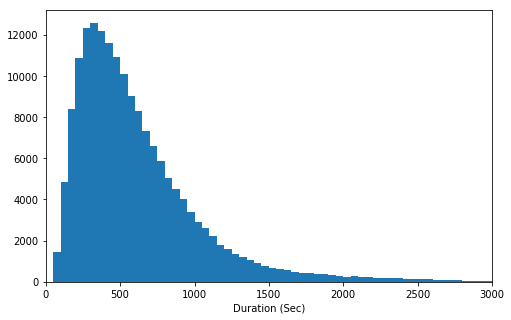

In [6]:
# start with a standard-scaled plot of the duration_sec column
binsize = 50
bins = np.arange(50, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([0, 3000]);

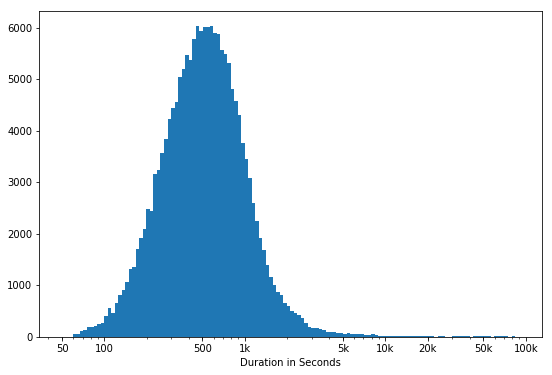

In [7]:
# there's a long tail in the distribution, so it is plotted on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[9, 6])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration in Seconds');

## Frequency of trips taken per day in a week

> The day with the most of the trips recorded on start and end days are Thurdays. This is followed by Tuedays, then, Friday, Wednesday and Monday (in descending order).
The weekends (Saturdays and Sundays) have the lowest trip records in the weeks

In [8]:
# First, I convert day, and hour into ordered categorical types so i can plot a bar chart
converted = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in converted:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = converted[var])
    df[var] = df[var].astype(ordered_var)

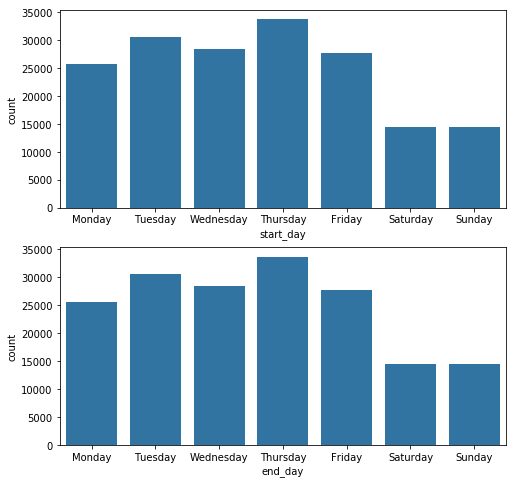

In [9]:
#Then I plot number of rides per day with seaborn
# ride frequency per days with start and end days as subplots

fig, ax = plt.subplots(2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_day', color = default_color,  ax = ax[0])
sb.countplot(data = df, x = 'end_day', color = default_color,  ax = ax[1])

## relationship between bike_share_for_all_trip and Customer type

> In the figure below, it can be seen that only Subscribers enage in bike-sharing. This may be because customers dont have access to the feature.

Only a small percentage of subscribers share bikes.

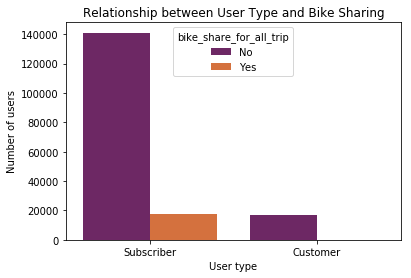

In [10]:
#plotting chart for user_type vs bike_share_for_all_trip
plt.plot(3, 1, 1)
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip', order=df.user_type.value_counts().index,
             palette = 'inferno')
plt.title('Relationship between User Type and Bike Sharing')
plt.xlabel('User type')
plt.ylabel('Number of users')
plt.show()

## Relationship between Trip Duration and Age

> In the case of Trip Duration and Age, it can be seen that most recorded users are aged between 20 and 45. Therfore, most trip duration is registered by younger users.

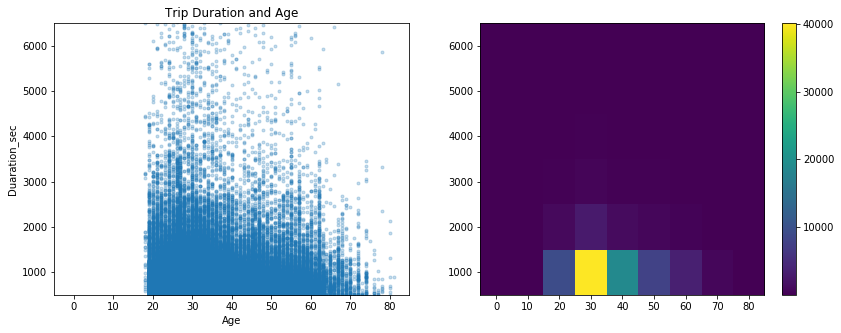

In [11]:
plt.figure(figsize=[14,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration_sec')

#Polt a colorplot to see better the age of users
plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - df['member_birth_year']), df['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

## The relationship between Trip Duration, Weekdays and User type

> In the case of the relationship between Trip Duration, Weekdays and User type, it can be seen that customers travel significantly longer distance especially during weekends. While subscribers travel shorter distances with slight spike during weekends but not up to that of the customers.

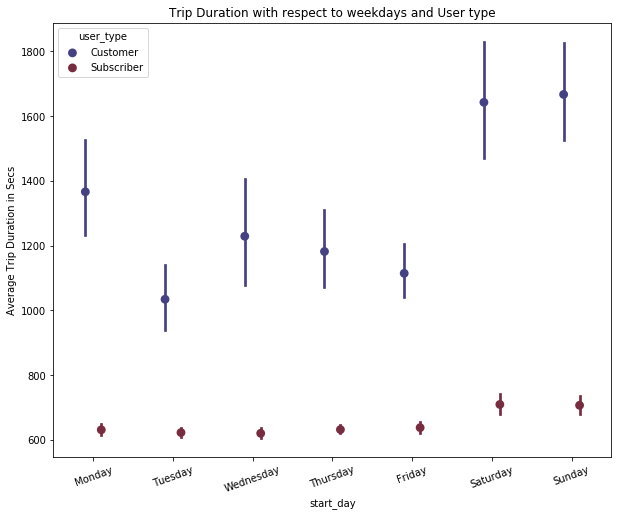

In [12]:
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = df, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'icefire', linestyles = '', dodge = 0.2)
plt.title('Trip Duration with respect to weekdays and User type')
plt.ylabel('Average Trip Duration in Secs')
plt.xticks(rotation=20)
ax.set_yticklabels([],minor = True)
plt.show();

## The relationship between trip duration, gender and user type

> In the chart above, it can be seen that the other gender group spent the most time duration during rides. This is followed by female and the Male gender records the lowest trip duration.

This is true for both User types.

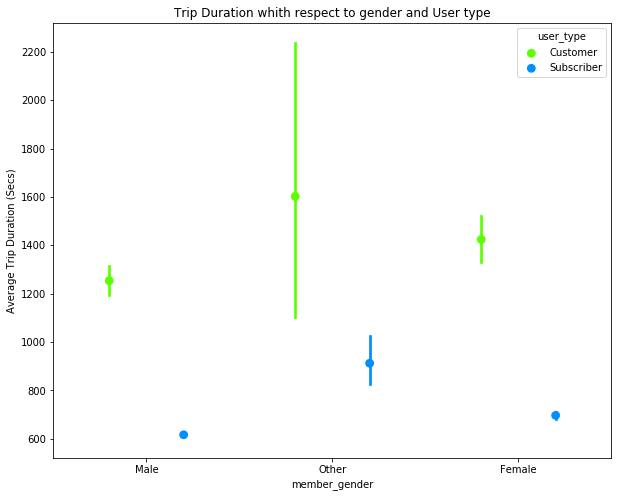

In [13]:
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = df, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'gist_rainbow', linestyles = '', dodge = 0.4)
plt.title('Trip Duration whith respect to gender and User type')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True)
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 512136 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/